# M12 Seminar: Economic and Social Problems: Insights from Big Data.
# Term Paper. 
# Replication file №5 - out-of-sample analysis + extension (results review)

### Imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load resulting DataFrames (replication and extension)

In [34]:
# load file
results = pd.read_csv('replication_oos_rmse_rf_xgb.csv')
# select columns of interest
repl_res = results[['rfr_baseline_losses_test', 
                    'rfr_baseline_sci_losses_test', 
                    'rfr_baseline_lex_google_losses_test', 
                    'rfr_baseline_lex_google_sci_losses_test']]

In [35]:
# calculate differences after inclusion of SCI
repl_res['rfr_baseline_test_sci_diff'] = repl_res['rfr_baseline_sci_losses_test'] - repl_res['rfr_baseline_losses_test']
repl_res['rfr_baseline_lex_google_test_sci_diff'] = repl_res['rfr_baseline_lex_google_sci_losses_test'] - repl_res['rfr_baseline_lex_google_losses_test']

In [36]:
# construct new DataFrame with RMSE differences
repl_df = repl_res[['rfr_baseline_test_sci_diff', 'rfr_baseline_lex_google_test_sci_diff']]
repl_df.columns = ['Baseline Model. Diff. from Social Proximity', 
                   'Baseline+LEX+Goog. Model. Diff. from Social Proximity']
repl_df.index.name = 'Week #'

In [37]:
repl_df

,Baseline Model. Diff. from Social Proximity,Baseline+LEX+Goog. Model. Diff. from Social Proximity
Week #,,
0,0.206488,0.105697
1,-0.000202,-0.016455
2,-0.000089,-0.023757
3,-0.000095,-0.007993
4,-0.001234,-0.007884
5,-0.014858,0.001694
6,-0.019670,-0.001087
7,-0.018778,-0.011043
8,0.011717,0.016560


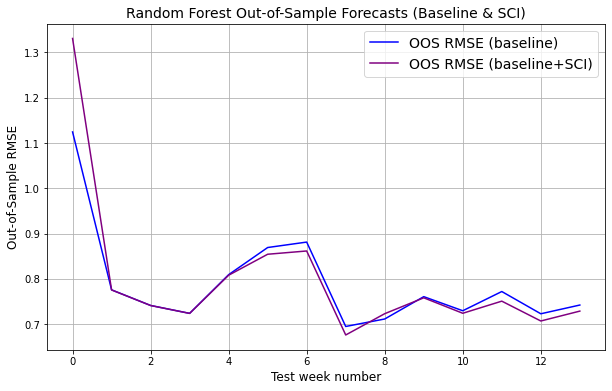

In [38]:
# plot random forest RMSE dynamics
plt.figure(figsize=(10, 6))
plt.plot(repl_res['rfr_baseline_losses_test'], color='blue', label='OOS RMSE (baseline)')
plt.plot(repl_res['rfr_baseline_sci_losses_test'], color='purple', label='OOS RMSE (baseline+SCI)')
plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Out-of-Sample RMSE', fontsize=12)
plt.xlabel('Test week number', fontsize=12)
plt.title('Random Forest Out-of-Sample Forecasts (Baseline & SCI)', fontsize=14)
plt.show()

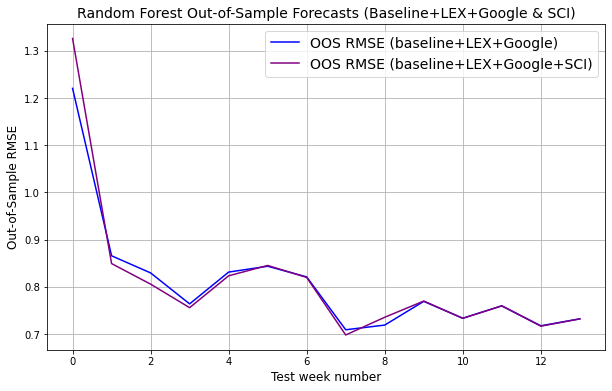

In [39]:
# plot random forest RMSE dynamics
plt.figure(figsize=(10, 6))
plt.plot(repl_res['rfr_baseline_lex_google_losses_test'], color='blue', label='OOS RMSE (baseline+LEX+Google)')
plt.plot(repl_res['rfr_baseline_lex_google_sci_losses_test'], color='purple', label='OOS RMSE (baseline+LEX+Google+SCI)')
plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Out-of-Sample RMSE', fontsize=12)
plt.xlabel('Test week number', fontsize=12)
plt.title('Random Forest Out-of-Sample Forecasts (Baseline+LEX+Google & SCI)', fontsize=14)
plt.show()

In [45]:
# select columns of interest (XGBoost)
xgb_res = results[['xgb_baseline_losses_test', 
                   'xgb_baseline_sci_losses_test', 
                   'xgb_baseline_lex_google_losses_test', 
                   'xgb_baseline_lex_google_sci_losses_test']]
# calculate RMSE differences
xgb_res['Baseline Model. Diff. from Social Proximity'] = xgb_res['xgb_baseline_sci_losses_test'] - xgb_res['xgb_baseline_losses_test']
xgb_res['Baseline+LEX+Goog. Model. Diff. from Social Proximity'] = xgb_res['xgb_baseline_lex_google_sci_losses_test'] - xgb_res['xgb_baseline_lex_google_losses_test']

In [73]:
# print(xgb_res.iloc[:, -2:].to_latex())

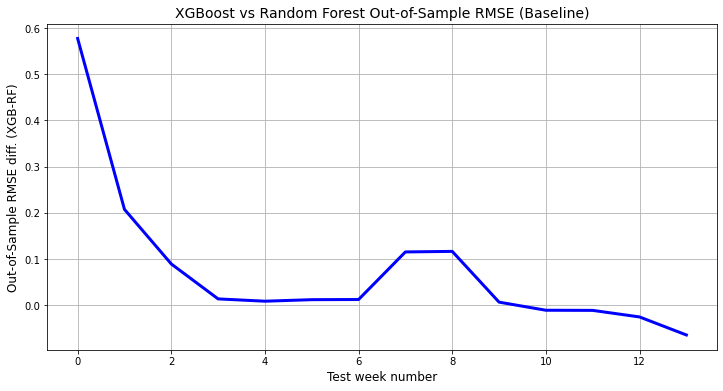

In [66]:
# plot dynamic RMSE (XGBoost - Random Forest)
plt.figure(figsize=(12, 6))
plt.plot(results['xgb_baseline_losses_test'] - results['rfr_baseline_losses_test'], c='blue', linewidth=3)
plt.grid()
plt.ylabel('Out-of-Sample RMSE diff. (XGB-RF)', fontsize=12)
plt.xlabel('Test week number', fontsize=12)
plt.title('XGBoost vs Random Forest Out-of-Sample RMSE (Baseline)', fontsize=14)
plt.show()